In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load data

In [2]:
df1 = pd.read_csv("data/train_first/public_train_x_ccba_full_hashed.csv")
df1 = df1.sort_values(["cust_id", "byymm"]).reset_index(drop = True)
print(df1.shape)
print("cust_id:", df1["cust_id"].nunique())
df1.head()

(59075, 10)
cust_id: 4745


,cust_id,lupay,byymm,cycam,usgam,clamt,csamt,inamt,cucsm,cucah
0,0015cc01f553512007705edf855baa16f1b57a16fb107e...,3920.0,0,134614.0,32316.0,0.0,0.0,3148.0,16576.0,0.0
1,0015cc01f553512007705edf855baa16f1b57a16fb107e...,16576.0,30,134614.0,22280.0,0.0,0.0,3148.0,8653.0,0.0
2,0015cc01f553512007705edf855baa16f1b57a16fb107e...,8653.0,61,134614.0,14771.0,0.0,0.0,3148.0,5045.0,0.0
3,0015cc01f553512007705edf855baa16f1b57a16fb107e...,5045.0,91,134614.0,10954.0,0.0,0.0,3148.0,4334.0,0.0
4,0015cc01f553512007705edf855baa16f1b57a16fb107e...,4334.0,122,134614.0,7544.0,0.0,0.0,3148.0,4396.0,0.0


<AxesSubplot: >

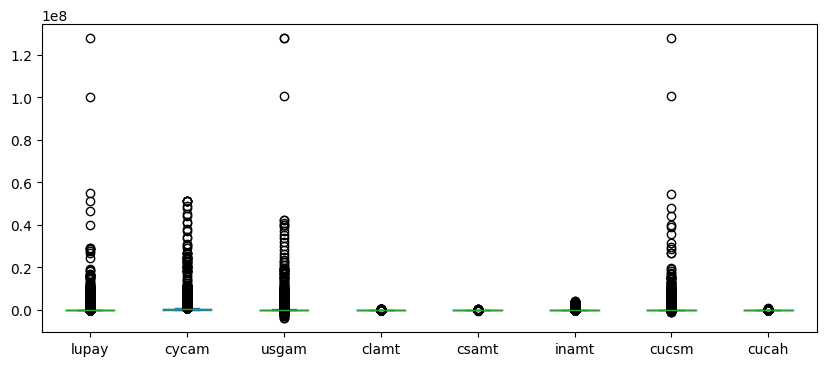

In [3]:
num_feats = ['lupay', 'cycam', 'usgam', 'clamt', 'csamt', 'inamt', 'cucsm', 'cucah']
df1[num_feats].plot(kind = "box", figsize  = (10, 4))

In [4]:
df2 = pd.read_csv("data/train_first/public_train_x_cdtx0001_full_hashed.csv")
df2 = df2.sort_values(["cust_id", "date"]).reset_index(drop = True)
print(df2.shape)
print("cust_id:", df2["cust_id"].nunique())
df2.head()

(1043014, 5)
cust_id: 3945


,cust_id,date,country,cur_type,amt
0,0015cc01f553512007705edf855baa16f1b57a16fb107e...,21,130,47,13428.0
1,0015cc01f553512007705edf855baa16f1b57a16fb107e...,52,130,47,202.0
2,0015cc01f553512007705edf855baa16f1b57a16fb107e...,56,130,47,3624.0
3,0015cc01f553512007705edf855baa16f1b57a16fb107e...,59,130,47,175.0
4,0015cc01f553512007705edf855baa16f1b57a16fb107e...,62,130,47,128.0


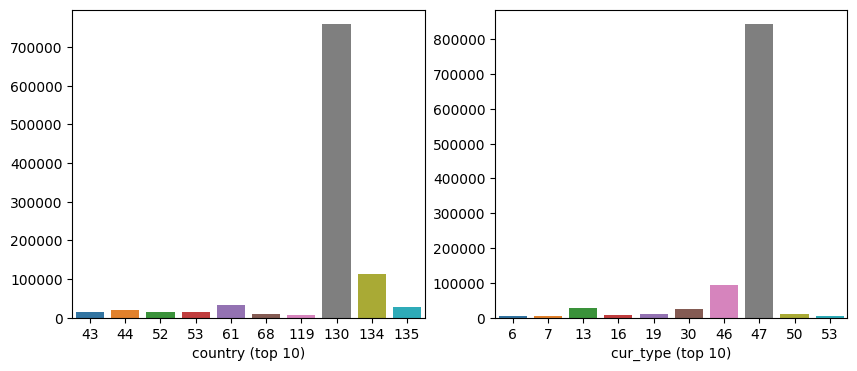

In [5]:
feats = ["country", "cur_type"]
k = 0
a, b = 1, 2
fig, ax = plt.subplots(a, b, figsize = (10, 4))
for j in range(b):
    try:
        count = df2.groupby(feats[k]).size().sort_values().iloc[-10:]

        count = count.reset_index()
        sns.barplot(x = feats[k], y = 0, data = count, ax = ax[j])
        ax[j].set(xlabel = f"{feats[k]} (top 10)", ylabel = None)
        k += 1
    except:
        continue

<AxesSubplot: >

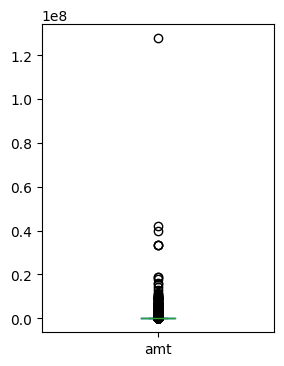

In [6]:
df2["amt"].plot(kind = "box", figsize  = (3, 4))

In [7]:
df3 = pd.read_csv("data/train_first/public_train_x_custinfo_full_hashed.csv")
print(df3.shape)
print("cust_id:", df3["cust_id"].nunique())
df3.head()

(25751, 6)
cust_id: 7708


,alert_key,cust_id,risk_rank,occupation_code,total_asset,AGE
0,352249,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,1,19.0,1465816.0,7
1,352253,b212d14cb35676926682b2cf849e295d948888f556c07e...,1,2.0,98177.0,2
2,352254,e5b0002791c7852644a2730abeaa893cdf14a072ef7812...,1,19.0,2052922.0,7
3,352280,74214c478dc6519fbefe4bc31693865bdcd698ab974b64...,3,15.0,201906.0,5
4,352282,0340e7611f0d82c3cb87e6194fa14bb2ccf8afbf1b3418...,1,12.0,7450.0,5


In [8]:
df4 = pd.read_csv("data/train_first/public_train_x_dp_full_hashed.csv")
df4 = df4.sort_values(["cust_id", "tx_date", "tx_time"]).reset_index(drop = True)
print(df4.shape)
print("cust_id:", df4["cust_id"].nunique())
df4.head()

(1969818, 12)
cust_id: 6196


,cust_id,debit_credit,tx_date,tx_time,tx_type,tx_amt,exchg_rate,info_asset_code,fiscTxId,txbranch,cross_bank,ATM
0,0015cc01f553512007705edf855baa16f1b57a16fb107e...,CR,11,15,2,826.0,1.000,13,4.0,145.0,1,1
1,0015cc01f553512007705edf855baa16f1b57a16fb107e...,DB,18,1,2,516.0,1.000,16,NaN,NaN,0,0
2,0015cc01f553512007705edf855baa16f1b57a16fb107e...,CR,35,15,2,4720.0,27.995,20,NaN,NaN,0,1
3,0015cc01f553512007705edf855baa16f1b57a16fb107e...,DB,35,15,2,526.0,27.995,20,NaN,NaN,0,1
4,0015cc01f553512007705edf855baa16f1b57a16fb107e...,CR,42,10,2,2064.0,1.000,13,4.0,145.0,1,1


In [9]:
df5 = pd.read_csv("data/train_first/public_train_x_remit1_full_hashed.csv")
df5 = df5.sort_values(["cust_id", "trans_date"]).reset_index(drop = True)
print(df5.shape)
print("cust_id:", df5["cust_id"].nunique())
df5.head()

(17167, 4)
cust_id: 1144


,cust_id,trans_date,trans_no,trade_amount_usd
0,002f13f534d0bd9fcc1848db3ff5c7b1179d117f8de805...,153,4,343647.0
1,0032adaf4a8731b4d6a3fdcba32f9ebdcd336490eda155...,223,3,6071.0
2,0032adaf4a8731b4d6a3fdcba32f9ebdcd336490eda155...,312,4,60024.0
3,0032adaf4a8731b4d6a3fdcba32f9ebdcd336490eda155...,328,4,531413.0
4,0032adaf4a8731b4d6a3fdcba32f9ebdcd336490eda155...,356,0,2109.0


<AxesSubplot: xlabel='trans_no', ylabel='count'>

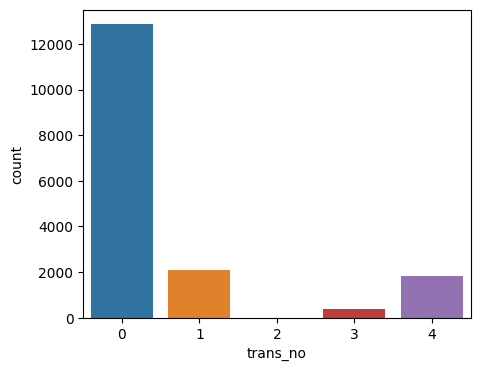

In [10]:
plt.figure(figsize = (5, 4))
sns.countplot(data = df5, x = "trans_no")

<AxesSubplot: >

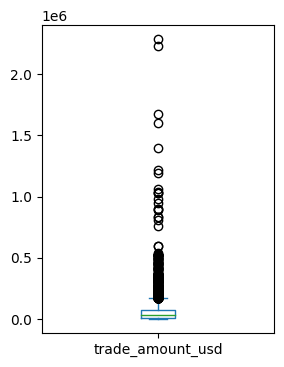

In [11]:
df5["trade_amount_usd"].plot(kind = "box", figsize  = (3, 4))

<AxesSubplot: ylabel='Density'>

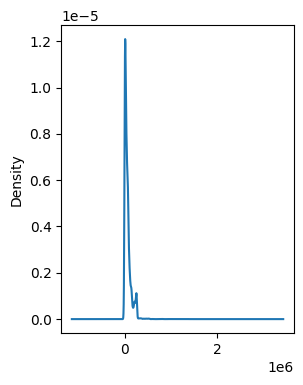

In [12]:
df5["trade_amount_usd"].plot(kind = "kde", figsize  = (3, 4))

In [13]:
df6 = pd.read_csv("data/train_first/public_x_alert_date.csv")
df6 = df6.sort_values("alert_key").reset_index(drop = True)
print(df6.shape)
df6.head()

(1845, 2)


,alert_key,date
0,352249,365
1,352253,365
2,352254,365
3,352280,365
4,352282,365


In [14]:
df7 = pd.read_csv("data/train_first/train_x_alert_date.csv")
df7 = df7.sort_values("alert_key").reset_index(drop = True)
print(df7.shape)
df7.head()

(23906, 2)


,alert_key,date
0,171142,0
1,171152,0
2,171177,0
3,171178,0
4,171180,0


In [15]:
df8 = pd.read_csv("data/train_first/train_y_answer.csv")
df8 = df8.sort_values("alert_key").reset_index(drop = True)
print(df8.shape)
df8.head()

(23906, 2)


,alert_key,sar_flag
0,171142,0
1,171152,0
2,171177,0
3,171178,0
4,171180,0


In [16]:
df9 = pd.read_csv("data/submit/預測的案件名單及提交檔案範例.csv")
df9 = df9.sort_values("alert_key").reset_index(drop = True)
print(df9.shape)
df9.head()

(3850, 2)


,alert_key,probability
0,352249,0.098923
1,352253,0.344260
2,352254,0.177932
3,352280,0.784828
4,352282,0.949316


### custinfo(df3) - 基本資料 & alert_time(df6、df7) & y(df8) - 洗錢資料

In [17]:
y_train = pd.merge(df7, df8, on = "alert_key")
y_train

,alert_key,date,sar_flag
0,171142,0,0
1,171152,0,0
2,171177,0,0
3,171178,0,0
4,171180,0,0
...,...,...,...
23901,352123,364,0
23902,352124,364,0
23903,352125,364,0
23904,352128,364,0


In [18]:
y_test = df6
y_test["sar_flag"] = None
y_test

,alert_key,date,sar_flag
0,352249,365,None
1,352253,365,None
2,352254,365,None
3,352280,365,None
4,352282,365,None
...,...,...,...
1840,365001,393,None
1841,365004,393,None
1842,365008,393,None
1843,365009,393,None


In [19]:
y = pd.concat([y_train, y_test], ignore_index = True)
y

,alert_key,date,sar_flag
0,171142,0,0
1,171152,0,0
2,171177,0,0
3,171178,0,0
4,171180,0,0
...,...,...,...
25746,365001,393,None
25747,365004,393,None
25748,365008,393,None
25749,365009,393,None


In [20]:
df = pd.merge(y, df3, on = "alert_key", how = "outer")
df

,alert_key,date,sar_flag,cust_id,risk_rank,occupation_code,total_asset,AGE
0,171142,0,0,a39fea9aec90969fe66a2b2b4d1b86368a2d38e8b8d4bf...,3,12.0,241719.0,3
1,171152,0,0,7e42b5dca9b28ee8e5545beb834361e90e6197d176b389...,3,13.0,599497.0,6
2,171177,0,0,a6cdf6302aead77112013168c6d546d2df3bcb551956d2...,1,19.0,51160.0,4
3,171178,0,0,1a3efa69705f611c7ef2384a715c8142e2ee801cfec9df...,3,9.0,3634343.0,6
4,171180,0,0,67f8cbb64dd3d447e992b1b299e0ceed3372188e47c88e...,1,17.0,4076287.0,4
...,...,...,...,...,...,...,...,...
25746,365001,393,None,18ee644a371548e9780d701aaa7e0c8c42a7794cdee755...,1,17.0,135072.0,3
25747,365004,393,None,7f69fa9eab8f397d367e2bb61ee1fa008999a0aab91e06...,3,12.0,2285386.0,3
25748,365008,393,None,12c9e6d35500d2a96fc2b22a9da8e3deb6048de515a16e...,3,19.0,1230244.0,2
25749,365009,393,None,d24d46c19002ab1f9a02801af5e4be6a154b3c5adc0417...,1,17.0,162418.0,2


<AxesSubplot: xlabel='sar_flag', ylabel='count'>

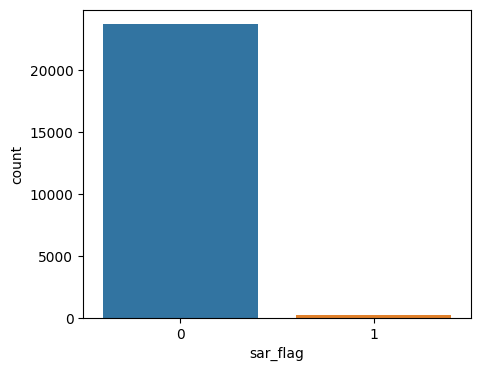

In [21]:
plt.figure(figsize = (5, 4))
sns.countplot(data = df, x = "sar_flag")

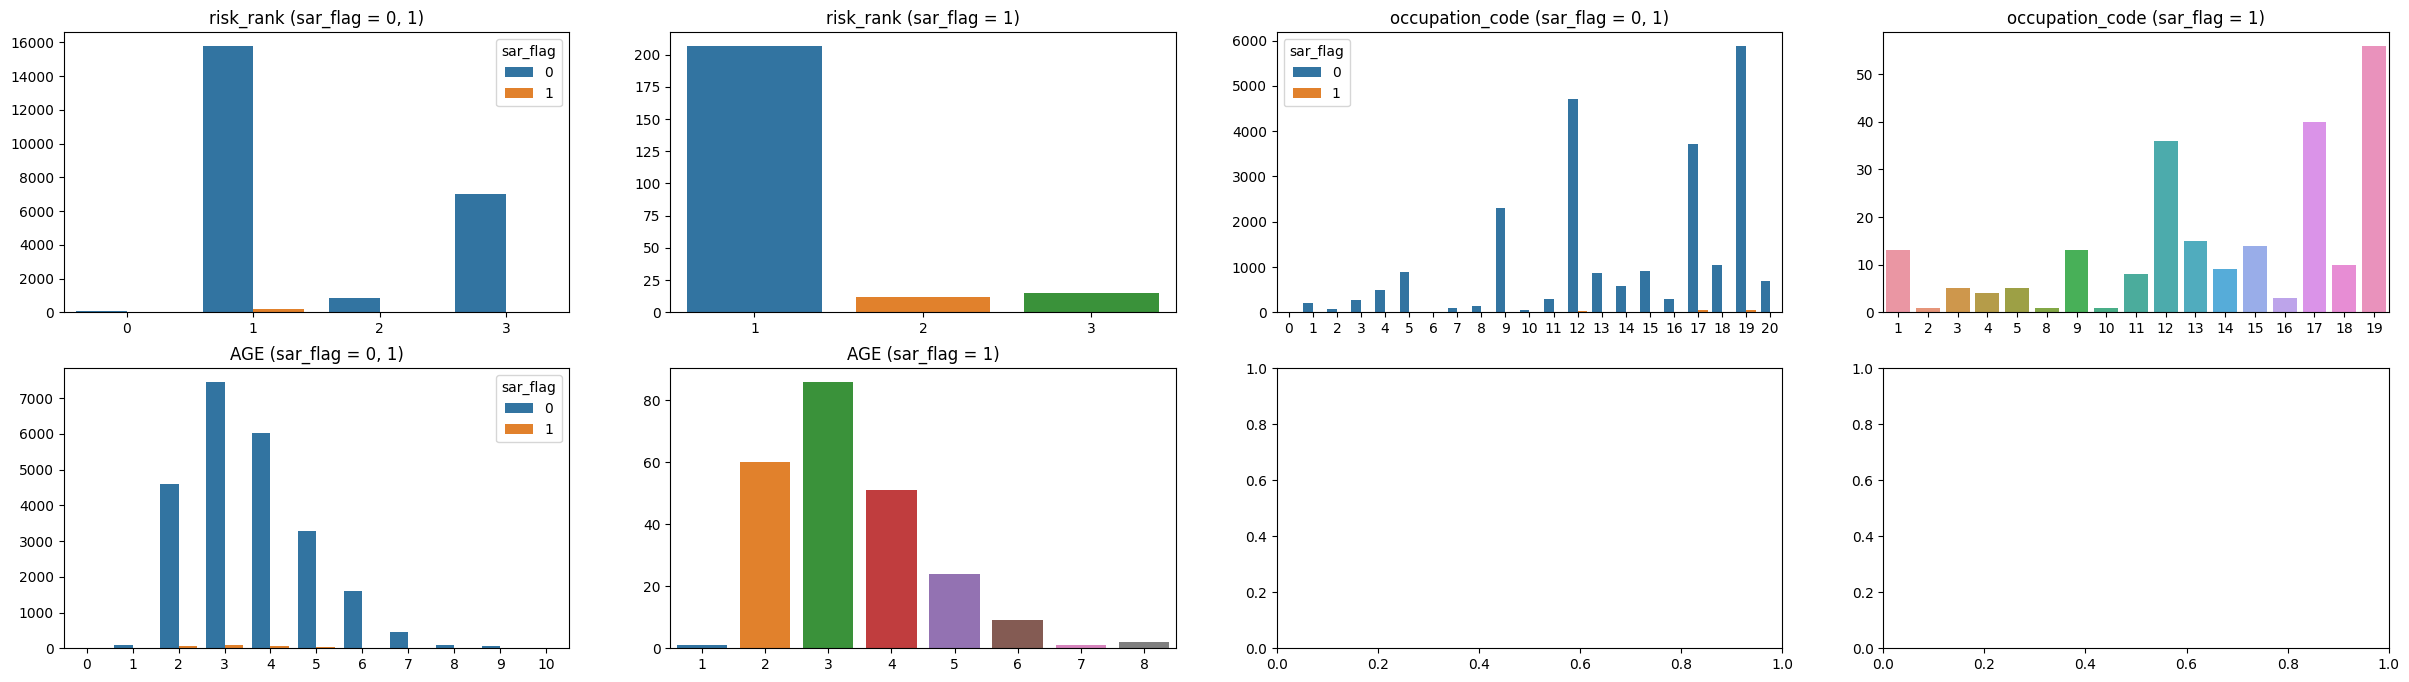

In [22]:
feats = ["risk_rank", "occupation_code", "AGE"]
train = df[~df["sar_flag"].isnull()]
k = 0
a, b = 2, 4
fig, ax = plt.subplots(a, b, figsize = (30, 8))
for i in range(a):
    for j in range(0, b, 2):
        try:
            train1 = train.copy()
            if feats[k] == "occupation_code":
                train1 = train1.dropna()
                train1[feats[k]] = train1[feats[k]].astype(int)

            sns.countplot(data = train1, x = feats[k], hue = "sar_flag", ax = ax[i, j])
            sns.countplot(data = train1.query("sar_flag == 1"), x = feats[k], ax = ax[i, j+1])

            ax[i, j].set(ylabel = None, xlabel = None, title = f"{feats[k]} (sar_flag = 0, 1)")
            ax[i, j + 1].set(ylabel = None, xlabel = None, title = f"{feats[k]} (sar_flag = 1)")
            k += 1
        except:
            continue

<AxesSubplot: xlabel='sar_flag', ylabel='total_asset'>

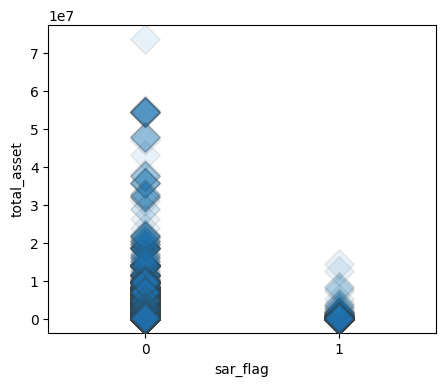

In [23]:
plt.figure(figsize = (5, 4))
sns.stripplot(
                data = train, x = "sar_flag", y = "total_asset",
                jitter = False, s = 15, marker = "D", linewidth = 1, alpha = 0.1
            )

In [24]:
df.to_csv("data/inverse/data_raw.csv", index = False)

### ccba(df1) - 額度資料(月)
byymm(帳務年月): 是月資料，以每月同一日做為顯示代表

In [25]:
print(df1.shape)
print("cust_id:", df1["cust_id"].nunique())
df1.head()

(59075, 10)
cust_id: 4745


,cust_id,lupay,byymm,cycam,usgam,clamt,csamt,inamt,cucsm,cucah
0,0015cc01f553512007705edf855baa16f1b57a16fb107e...,3920.0,0,134614.0,32316.0,0.0,0.0,3148.0,16576.0,0.0
1,0015cc01f553512007705edf855baa16f1b57a16fb107e...,16576.0,30,134614.0,22280.0,0.0,0.0,3148.0,8653.0,0.0
2,0015cc01f553512007705edf855baa16f1b57a16fb107e...,8653.0,61,134614.0,14771.0,0.0,0.0,3148.0,5045.0,0.0
3,0015cc01f553512007705edf855baa16f1b57a16fb107e...,5045.0,91,134614.0,10954.0,0.0,0.0,3148.0,4334.0,0.0
4,0015cc01f553512007705edf855baa16f1b57a16fb107e...,4334.0,122,134614.0,7544.0,0.0,0.0,3148.0,4396.0,0.0


In [26]:
# 抓出日期轉換邏輯
byymm = df1["byymm"].unique().tolist() # 有哪些月
diff = [byymm[i] - byymm[i-1] for i in range(1, len(byymm))] # 逐月相減會發現相差的天數可以推估實際月份
month = pd.DataFrame(zip(byymm, diff), columns = ["raw_month", "diff_date"])
month["month"] = list(range(4, 13)) + list(range(1, 4))
month

,raw_month,diff_date,month
0,0,30,4
1,30,31,5
2,61,30,6
3,91,31,7
4,122,31,8
5,153,30,9
6,183,31,10
7,214,30,11
8,244,31,12
9,275,31,1


In [27]:
# 日期原始值
import datetime

date_map = {}
origin_date = datetime.date(2021, 4, 1)
for i in range(0, df["date"].unique()[-1]+1):
    date_map[i] = origin_date
    origin_date += datetime.timedelta(days = 1)

In [28]:
# 日期逆轉換
df1["byymm"] = df1["byymm"].map(date_map)
df["date"] = df["date"].map(date_map)

df1.head()

,cust_id,lupay,byymm,cycam,usgam,clamt,csamt,inamt,cucsm,cucah
0,0015cc01f553512007705edf855baa16f1b57a16fb107e...,3920.0,2021-04-01,134614.0,32316.0,0.0,0.0,3148.0,16576.0,0.0
1,0015cc01f553512007705edf855baa16f1b57a16fb107e...,16576.0,2021-05-01,134614.0,22280.0,0.0,0.0,3148.0,8653.0,0.0
2,0015cc01f553512007705edf855baa16f1b57a16fb107e...,8653.0,2021-06-01,134614.0,14771.0,0.0,0.0,3148.0,5045.0,0.0
3,0015cc01f553512007705edf855baa16f1b57a16fb107e...,5045.0,2021-07-01,134614.0,10954.0,0.0,0.0,3148.0,4334.0,0.0
4,0015cc01f553512007705edf855baa16f1b57a16fb107e...,4334.0,2021-08-01,134614.0,7544.0,0.0,0.0,3148.0,4396.0,0.0


In [29]:
# ccba以當月最後一天為日期
df1["byymm"] = df1["byymm"] + pd.tseries.offsets.MonthEnd()
df1.head()

,cust_id,lupay,byymm,cycam,usgam,clamt,csamt,inamt,cucsm,cucah
0,0015cc01f553512007705edf855baa16f1b57a16fb107e...,3920.0,2021-04-30,134614.0,32316.0,0.0,0.0,3148.0,16576.0,0.0
1,0015cc01f553512007705edf855baa16f1b57a16fb107e...,16576.0,2021-05-31,134614.0,22280.0,0.0,0.0,3148.0,8653.0,0.0
2,0015cc01f553512007705edf855baa16f1b57a16fb107e...,8653.0,2021-06-30,134614.0,14771.0,0.0,0.0,3148.0,5045.0,0.0
3,0015cc01f553512007705edf855baa16f1b57a16fb107e...,5045.0,2021-07-31,134614.0,10954.0,0.0,0.0,3148.0,4334.0,0.0
4,0015cc01f553512007705edf855baa16f1b57a16fb107e...,4334.0,2021-08-31,134614.0,7544.0,0.0,0.0,3148.0,4396.0,0.0


In [30]:
df.to_csv("data/inverse/info.csv", index = False)
df1.to_csv("data/inverse/ccba.csv", index = False)

### cdtx(df2) - 信用卡交易資料(日)

In [31]:
print(df2.shape)
print("cust_id:", df2["cust_id"].nunique())
df2.head()

(1043014, 5)
cust_id: 3945


,cust_id,date,country,cur_type,amt
0,0015cc01f553512007705edf855baa16f1b57a16fb107e...,21,130,47,13428.0
1,0015cc01f553512007705edf855baa16f1b57a16fb107e...,52,130,47,202.0
2,0015cc01f553512007705edf855baa16f1b57a16fb107e...,56,130,47,3624.0
3,0015cc01f553512007705edf855baa16f1b57a16fb107e...,59,130,47,175.0
4,0015cc01f553512007705edf855baa16f1b57a16fb107e...,62,130,47,128.0


In [32]:
df2["date"] = df2["date"].map(date_map)
df2.head()

,cust_id,date,country,cur_type,amt
0,0015cc01f553512007705edf855baa16f1b57a16fb107e...,2021-04-22,130,47,13428.0
1,0015cc01f553512007705edf855baa16f1b57a16fb107e...,2021-05-23,130,47,202.0
2,0015cc01f553512007705edf855baa16f1b57a16fb107e...,2021-05-27,130,47,3624.0
3,0015cc01f553512007705edf855baa16f1b57a16fb107e...,2021-05-30,130,47,175.0
4,0015cc01f553512007705edf855baa16f1b57a16fb107e...,2021-06-02,130,47,128.0


In [33]:
df2.to_csv("data/inverse/cdtx.csv", index = False)

### dp(df4) - 借貸資料(日)

In [34]:
print(df4.shape)
print("cust_id:", df4["cust_id"].nunique())
df4.head()

(1969818, 12)
cust_id: 6196


,cust_id,debit_credit,tx_date,tx_time,tx_type,tx_amt,exchg_rate,info_asset_code,fiscTxId,txbranch,cross_bank,ATM
0,0015cc01f553512007705edf855baa16f1b57a16fb107e...,CR,11,15,2,826.0,1.000,13,4.0,145.0,1,1
1,0015cc01f553512007705edf855baa16f1b57a16fb107e...,DB,18,1,2,516.0,1.000,16,NaN,NaN,0,0
2,0015cc01f553512007705edf855baa16f1b57a16fb107e...,CR,35,15,2,4720.0,27.995,20,NaN,NaN,0,1
3,0015cc01f553512007705edf855baa16f1b57a16fb107e...,DB,35,15,2,526.0,27.995,20,NaN,NaN,0,1
4,0015cc01f553512007705edf855baa16f1b57a16fb107e...,CR,42,10,2,2064.0,1.000,13,4.0,145.0,1,1


In [35]:
df4["tx_date"] = df4["tx_date"].map(date_map)
df4["tx_date"] = pd.to_datetime(df4["tx_date"])
df4.head()

,cust_id,debit_credit,tx_date,tx_time,tx_type,tx_amt,exchg_rate,info_asset_code,fiscTxId,txbranch,cross_bank,ATM
0,0015cc01f553512007705edf855baa16f1b57a16fb107e...,CR,2021-04-12,15,2,826.0,1.000,13,4.0,145.0,1,1
1,0015cc01f553512007705edf855baa16f1b57a16fb107e...,DB,2021-04-19,1,2,516.0,1.000,16,NaN,NaN,0,0
2,0015cc01f553512007705edf855baa16f1b57a16fb107e...,CR,2021-05-06,15,2,4720.0,27.995,20,NaN,NaN,0,1
3,0015cc01f553512007705edf855baa16f1b57a16fb107e...,DB,2021-05-06,15,2,526.0,27.995,20,NaN,NaN,0,1
4,0015cc01f553512007705edf855baa16f1b57a16fb107e...,CR,2021-05-13,10,2,2064.0,1.000,13,4.0,145.0,1,1


In [36]:
for i in range(len(df4)):
    df4.iloc[i, 3] = df4.iloc[i, 2] + datetime.timedelta(hours = int(df4.iloc[i, 3]))
    # df4.iloc[i, 2] = df4.iloc[i, 2] + datetime.timedelta(hours = int(df4.iloc[i, 3]))
df4.head()

,cust_id,debit_credit,tx_date,tx_time,tx_type,tx_amt,exchg_rate,info_asset_code,fiscTxId,txbranch,cross_bank,ATM
0,0015cc01f553512007705edf855baa16f1b57a16fb107e...,CR,2021-04-12,2021-04-12 15:00:00,2,826.0,1.000,13,4.0,145.0,1,1
1,0015cc01f553512007705edf855baa16f1b57a16fb107e...,DB,2021-04-19,2021-04-19 01:00:00,2,516.0,1.000,16,NaN,NaN,0,0
2,0015cc01f553512007705edf855baa16f1b57a16fb107e...,CR,2021-05-06,2021-05-06 15:00:00,2,4720.0,27.995,20,NaN,NaN,0,1
3,0015cc01f553512007705edf855baa16f1b57a16fb107e...,DB,2021-05-06,2021-05-06 15:00:00,2,526.0,27.995,20,NaN,NaN,0,1
4,0015cc01f553512007705edf855baa16f1b57a16fb107e...,CR,2021-05-13,2021-05-13 10:00:00,2,2064.0,1.000,13,4.0,145.0,1,1


df4 = df4.drop("tx_time", axis = 1)

In [37]:
df4.to_csv("data/inverse/dp.csv", index = False)

### remit(df5) - 外匯匯出資料(日)

In [38]:
print(df5.shape)
print("cust_id:", df5["cust_id"].nunique())
df5.head()

(17167, 4)
cust_id: 1144


,cust_id,trans_date,trans_no,trade_amount_usd
0,002f13f534d0bd9fcc1848db3ff5c7b1179d117f8de805...,153,4,343647.0
1,0032adaf4a8731b4d6a3fdcba32f9ebdcd336490eda155...,223,3,6071.0
2,0032adaf4a8731b4d6a3fdcba32f9ebdcd336490eda155...,312,4,60024.0
3,0032adaf4a8731b4d6a3fdcba32f9ebdcd336490eda155...,328,4,531413.0
4,0032adaf4a8731b4d6a3fdcba32f9ebdcd336490eda155...,356,0,2109.0


In [39]:
# 日期逆轉換
df5["trans_date"] = df5["trans_date"].map(date_map)
df5.head()

,cust_id,trans_date,trans_no,trade_amount_usd
0,002f13f534d0bd9fcc1848db3ff5c7b1179d117f8de805...,2021-09-01,4,343647.0
1,0032adaf4a8731b4d6a3fdcba32f9ebdcd336490eda155...,2021-11-10,3,6071.0
2,0032adaf4a8731b4d6a3fdcba32f9ebdcd336490eda155...,2022-02-07,4,60024.0
3,0032adaf4a8731b4d6a3fdcba32f9ebdcd336490eda155...,2022-02-23,4,531413.0
4,0032adaf4a8731b4d6a3fdcba32f9ebdcd336490eda155...,2022-03-23,0,2109.0


In [40]:
df5.to_csv("data/inverse/remit.csv", index = False)

## Statistical report

In [41]:
import pandas as pd

info = pd.read_csv("data/inverse/info.csv")
ccba = pd.read_csv("data/inverse/ccba.csv")
cdtx = pd.read_csv("data/inverse/cdtx.csv")
dp = pd.read_csv("data/inverse/dp.csv")
remit = pd.read_csv("data/inverse/remit.csv")

In [42]:
from pandas_profiling import ProfileReport

names = ['custinfo', 'ccba', 'cdtx', 'dp', 'remit']
datas = [info, ccba, cdtx, dp, remit]
num_files = len(datas)

for i in range(num_files):
    print(f'{names[i]}: {datas[i].shape}')
    profile = ProfileReport(datas[i], minimal=True, title=names[i])
    profile.to_file(f'data/data_report/{names[i]}.html', )

custinfo: (25751, 8)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

ccba: (59075, 10)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

cdtx: (1043014, 5)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

dp: (1969818, 12)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

remit: (17167, 4)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]